# Campo Escalar e Vetorial

## Preamble

In [1]:
import av_utils as av
import numpy as np
import sympy as sp
import sympy.vector as sv
import plotly.graph_objects as go
from sympy.plotting.plot import plot3d, plot3d_parametric_line, plot3d_parametric_surface, plot_parametric
import matplotlib.pyplot as plt

Preparandndo o ambiente de plotagem

In [2]:
sp.init_printing()

Definir algumas variaveis para usar

In [22]:
x,y,z,t,s,u,v, phi, theta = sp.symbols('x y z t s u v phi theta',real=True)

Definir um sistema de coordenadas

In [4]:
R = sv.CoordSys3D('R')

## Campo Escalar

Um exemplo clássico de campo escalar é o campo de temperatura, $T(x,y,z)$. Para cada ponto do espaço associamos um valor numérico que representa a temperatura naquele ponto. Por exemplo: $T(2,0,-1)=22.1$, isso significa que a temperatura no ponto $(2,0,-1)$ é igual 22.1. O conceito de campo escalar é relacionado com o valor numérico que a função gera, perante do campo vetorial que gera um vetor para cada ponto do espaço. Vamos estudar o campo vetorial na próxima seção. Para visualizar um campo escalar podemos utilizar o objeto *density_contour* no Plotly. 
Vamos imaginar que a temperatura de um plano metálico é descrito por a função $T(x,y)=\frac{1}{sin(x) sin(y) +2}$. Presta atenção que essa equação é a mesma equação de uma superficie 3D! No fundo, um campo escalar 2D, $T(x,y)$ é a projeção de uma superficie $z = T(x,y)$ no plano $xOy$. Então um campo scalar pode ser implementada igual uma superficie

In [ ]:
def scalar_field(x,y): return 1/(sp.sin(x) * sp.cos(y)+2)

Por exemplo, o valor deste campo no ponto (2,3) é

In [ ]:
scalar_field(2,3)

E o seu valor numerico é 

In [ ]:
sp.N(scalar_field(2,3))

Para visualizar esse campo temos que fazer alguns passos, muito parecidos com a visualização das curvas

In [ ]:
scalar_field_np = sp.lambdify([x,y],scalar_field(x,y))

Só para testar se a função foi transformado corretamente do Sympy para Numpy

In [ ]:
scalar_field_np(2,3)

O proximp passo sera produzir dois conjuntos de pontos, para x, y e z

In [ ]:
xx, yy = np.mgrid[-5:5:20j, -5:5:20j]
zz = scalar_field_np(xx, yy)

Vamos dar uma olhada na superficie associada com esse campo

In [ ]:
fig = go.Figure()
fig.add_surface(x = xx, y = yy, z = zz)

In [ ]:
fig = go.Figure()
fig.add_surface(x = xx, y = yy, z = zz)
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))

In [ ]:
fig = go.Figure()
fig.add_surface(x =np.linspace(-5,5,50), y = np.linspace(-5,5,50), z = zz)
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))

E finalmente a visualização do campo escalar é 

In [ ]:
fig = go.Figure()
fig.add_heatmap(x =np.linspace(-5,5,21), y = np.linspace(-5,5,21), z= zz, connectgaps=True, zsmooth='best')

Comparando as duas plotagens podemos entender melhor a relação entre o campo escalar 2D e o sua superficie associada. 

Como outro exemplo, imaginem que tem uma fonte térmica de 25 graus no ponto (0,0). Na medida que se afastamos do ponto a temperatura cai. Depende da taxa de caimento da temperatura, uma possível visualização seria  

In [ ]:
def temp(x,y): 
    return 25 - (x**2 + y**2)

In [ ]:
temp_np = sp.lambdify([x,y],temp(x,y))
xx, yy = np.mgrid[-5:5:20j, -5:5:20j]
zz = temp_np(xx, yy)
fig = go.Figure()
fig.add_heatmap(x =np.linspace(-5,5,21), y = np.linspace(-5,5,21), z= zz, connectgaps=True, zsmooth='best')
fig.update_layout(yaxis=dict(scaleanchor="x", scaleratio=1))

Para facilitar a vida, foi implementada uma função no modulo *av_plot* para plotar os campos escalares.

In [ ]:
av.plot_density_function(temp(x,y), (x,-5,5), (y,-5,5))

In [ ]:
av.plot3d_density_function(25-(x**2) - (y**2) - (z**2), (x,-7,7),(y,-7,7),(z,-7,7))

In [ ]:
av.plot3d_density_function(x * x * 0.5 + y * y + z * z * 2, (x,-7,7),(y,-7,7),(z,-7,7))

## Campo Vetorial

Campo vetorial é uma função que associa um vetor para cada ponto do espaço. Por exemplo, esse campo pode ser o fluxo do vento de um ar-condicionado. Para cada ponto do espaço o vento tem uma velocidade diferente dos outros pontos e essa velocidade é representada com um vetor. Um campo vetorial tem o formato geral
$$
\vec F (x,y,z) = P(x,y,z) \hat i + Q(x,y,z) \hat j + R(x,y,z) \hat k
$$
Em 2D, um exemplo de campo vetorial é $\vec F(x,y) = -y \hat i + x \hat j$. Para ver alguns desses vetores, primeiro temos que definir essa campo, que é uma função, na forma de um vetor.

In [6]:
def field1(x,y): return -y*R.i + x*R.j

In [ ]:
field1(x,y)

In [ ]:
vectors = []
for xx in range(-2,3):
    for yy in range(-2,3):
        vectors.append(field1(x,y).subs(x,xx).subs(y,yy))

In [ ]:
vectors

Uma forma mais elegante (phytonic) de calcular esses vetores é 

In [ ]:
vectors = [field1(x,y).subs(x,xx).subs(y,yy) for xx in range(-2,2) for yy in range(-2,2)]

In [ ]:
vectors

Para visualizar esse campo temos que plotar esses vetores nos pontos $(x,y)$ que os geraram. Para fazer isso podemos usar a nossa função de *vector* do modulo *av_utils* ou a função interna de *create_quiver*. Primeiro, vamos usar a função interna 

In [ ]:
import plotly.figure_factory as ff
xx,yy = np.mgrid[-2:3, -2:3]
field1_np = sp.lambdify([x,y],tuple(field1(x,y).components.values()))
uu , vv = field1_np(xx,yy)

fig = ff.create_quiver(xx, yy, uu, vv)
fig.update_layout(yaxis=dict(scaleanchor="x", scaleratio=1))
fig.show()

Agora vamos plotar esse campo vetorial utilizando a função *vector* do modulo *av_utils*

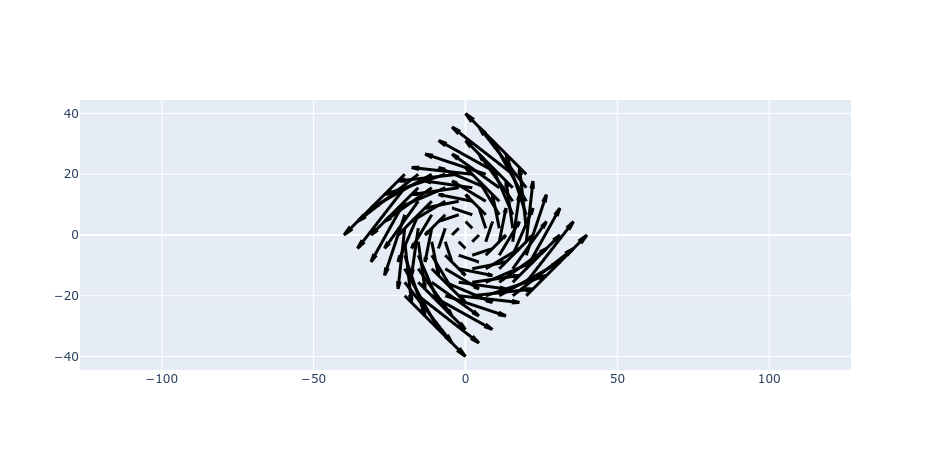

In [31]:
field1_np = sp.lambdify([x,y],tuple(field1(x,y).components.values()))

xx, yy = np.mgrid[-20:20:10j, -20:20:10j]

uu,vv = field1_np(xx,yy)

av.vector(x=xx, y=yy, u=uu, v=vv)
        


### 2D Streamplot

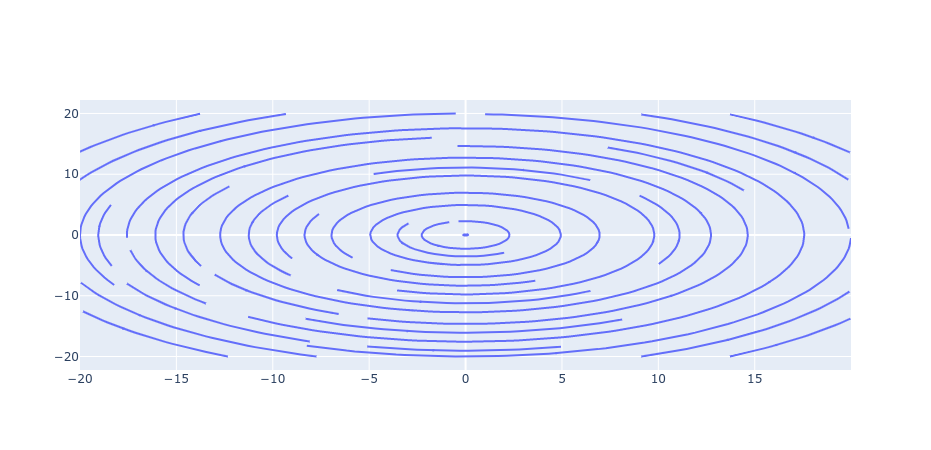

In [34]:
import plotly.figure_factory as ff

field1_np = sp.lambdify([x,y],tuple(field1(x,y).components.values()))

xx = np.linspace(-20, 20, 10)
yy = np.linspace(-20, 20, 10)
X, Y = np.meshgrid(xx, yy)
uu,vv = field1_np(X,Y)

#x = np.linspace(-3, 3, 100)
#y = np.linspace(-3, 3, 100)
#Y, X = np.meshgrid(x, y)
#u = -1 - X**2 + Y
#v = 1 + X - Y**2

# Create streamline figure
fig = ff.create_streamline(xx,yy, uu, vv, arrow_scale=.1)
fig.show()

Um dos campos vetoriais mais conhecidos é o campo gravitacional. O campo gravitacional entre dois objetos massivos de massa M e m localizados nos pontos $\vec r$ e $\vec{r}_1$  respetivamente é 

$$
\begin{align}
\vec F(x,y,z) &= -\frac{GmM}{|\vec r - \vec r_1|^3}\vec r - \vec r_1 \\
&= \frac{GmM}{\left((x-x_1)^2+(y-y_1)^2+(z-z_1)^2\right)^\frac{3}{2}} \left((x-x_1)\hat i+ (y-y_1)\hat j + (z-z_1)\hat k \right).
\end{align}
$$
Agora, se um dos objetos for na origem do sistema de coordenanadas ($\vec r_1 = 0$), teremos
$$
\begin{align}
\vec F(x,y,z) &= -\frac{GmM}{|\vec r|^3}\vec r \\
&= \frac{GmM}{\left(x^2+y^2+z^2\right)^\frac{3}{2}} \left(x\hat i+ y\hat j + z\hat k \right).
\end{align}
$$
Bom, vamos plotar esse campo vetorial em 3D, usando a função interna de *cone* do Plotly. A ideia é esolher alguns pontos do espaço e plotar os vetores associados com esses pontos. Para escolher esses pontos não há um criterio fixo. Podem ser pontos aleatorios ou pontos em uma rede. Aqui vamos optar por numeros aleatorios. 

In [ ]:
def gravitation(x,y,z, G=1, m=1, M=10):
    return -((G*m*M)/(x**2 + y**2 + z**2)**(3/2))*(x*R.i + y*R.j + z*R.k)

In [ ]:
gravitation(x,y,z)

In [ ]:
x,y,z = sp.symbols('x y z')

In [ ]:
xx, yy, zz = np.meshgrid(np.random.uniform(-0.8,1,15),
                      np.random.uniform(-0.8,1,15),
                      np.random.uniform(-0.8,1,15))



gravitation_np = sp.lambdify([x,y,z],tuple(gravitation(x,y,z).components.values()))

u,v,w = gravitation_np(xx,yy,zz)

Para usar a função *cone* precisamos inserir os pontos e os componentes dos vetores na forma de vetor, não matriz ou tensor. Então temos que "achatar" os tensores acima usando o comando *flatten()* do Numpy. Para facilitar a vida vamos definir uma função que faça isso para todos os nossos objetos

In [ ]:
def flatten_vf(x, y, z, u, v, w):
    return x.flatten(), y.flatten(), z.flatten(), u.flatten(), v.flatten(), w.flatten()

In [ ]:
xx,yy,zz,u,v,w = flatten_vf(xx,yy,zz,u,v,w)

Agora podemos plotar o campo vetorial

In [ ]:
fig = go.Figure()
fig.add_cone(x= xx,y = yy,z = zz,u = u,v = v,w = w, colorscale='Blues',
    sizemode="scaled", sizeref = 1)

**We are in trouble!** Os vetores perto da origem ficam muito grandes e praticamente dominam o grafico! Esse problema é entendivel. perto da origem, perto do ponto (0,0,0), a gente está fazendo divisão por zero para calcular a força gravitacional. Uma tentativa para burlar esse problema é tentar para plotar os vetores do campo, com um certo distancia da origem 

In [ ]:
r1x,r2x = np.random.randint(-20,-1,10), np.random.randint(1,20,10)
r1y,r2y = np.random.randint(-20,-1,10), np.random.randint(1,20,10)
r1z,r2z = np.random.randint(-20,-1,10), np.random.randint(1,20,10)

# Here we concatenate the arrays one after the other one 
rx = np.hstack([r1x,r2x])
ry = np.hstack([r1y,r2y])
rz = np.hstack([r1z,r2z])

Constructing the mesh

In [ ]:
xx,yy,zz = np.meshgrid(rx,ry,rz)

O resto do procedimento continua igual

In [ ]:
gravitation_np = sp.lambdify([x,y,z],tuple(gravitation(x,y,z).components.values()))

u,v,w = gravitation_np(xx,yy,zz)

In [ ]:
xx,yy,zz,u,v,w = flatten_vf(xx,yy,zz,u,v,w)

In [ ]:
fig = go.Figure()
fig.add_cone(x= xx,y = yy,z = zz,u = u,v = v,w = w, colorscale='Blues',
    sizemode="scaled", sizeref = 1)

Tem uma função chamada *plot3d_vector_field* no modulo *av_utils* que automatiza esse procedimento.

In [ ]:
av.plot3d_vector_field(gravitation(x,y,z),(x,-15,15),(y,-15,15),(z,-15,15), points=40)